In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.vector_ar.var_model import forecast

In [4]:
df = pd.read_csv("./data/c1.csv", parse_dates=['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

y = df['Consumption']
y.head()

Datetime
1988-01-01    107.5052
1988-02-01    105.6720
1988-03-01     97.4502
1988-04-01     92.4714
1988-05-01     90.3151
Name: Consumption, dtype: float64

In [6]:
size = int(len(y) * 0.8)
train = y.iloc[:size]
test = y.iloc[size:]

In [10]:
model = ExponentialSmoothing(
    train,
    seasonal='add',
    seasonal_periods=12
)

result = model.fit()
forecast = result.forecast(steps=len(test))


D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


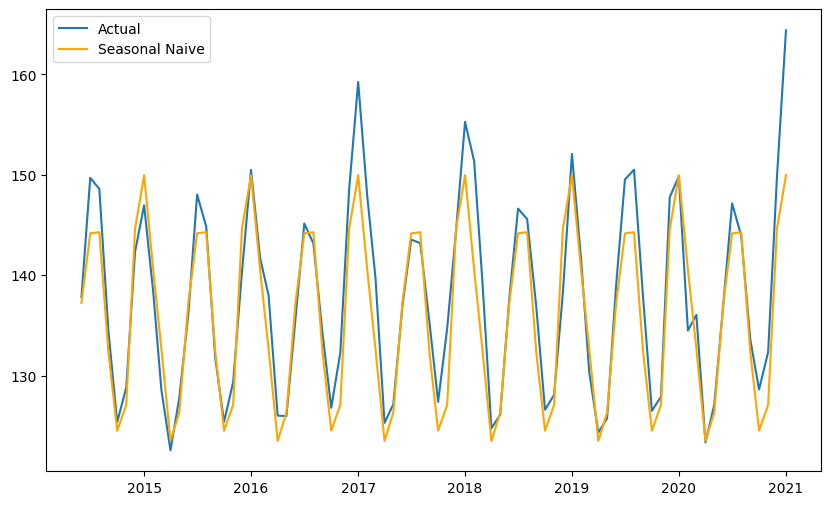

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(test   , label='Actual')
plt.plot(forecast, color='orange', label='Seasonal Naive')
plt.legend()
plt.show()